# Python Project - (Diabetics Analysis)
## by (Joseph Anumu George)

## Introduction
> Diabetes is a metabolic diseases that result from the body not having the capacity to convert sugar into glucose to be used for energy. Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood glucose(WHO).

>The dataset used for this project is Pima Indians Diabetes Dataset from Kaggle. This original dataset has been provided by the National Institute of Diabetes and Digestive and Kidney Diseases. Both dataset and code for this project are available on my GitHub repository. This dataset is used to predict whether a patient is likely to get diabetes based on the input parameters like Age, Glucose, Blood pressure, Insulin, BMI, etc. Each row in the data provides relevant information about the patient. It is to be noted that all patients here are females minimum 21 years old belonging to Pima Indian heritage(Devashree).
  

In [3]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Univariate Exploration

> In this section,I investigated the distributions of individual variables. 
I soughted to  see unusual points or outliers, taking a deeper look to clean things up
and prepared myself to look at relationships between variables.

>Pregnancies: indicates the number of pregnancies

>Glucose: indicates the plasma glucose concentration

>Blood Pressure: indicates diastolic blood pressure in mm/Hg

>Skin Thickness: indicates triceps skinfold thickness in mm

>Insulin: indicates insulin in U/mL

>BMI: indicates the body mass index in kg/m2

>Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history

>Age: indicates the age of the person


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['Outcome']=df['Outcome'].replace(1,'yes')
df['Outcome']=df['Outcome'].replace(0,'no')

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no
764,2,122,70,27,0,36.8,0.340,27,no
765,5,121,72,23,112,26.2,0.245,30,no
766,1,126,60,0,0,30.1,0.349,47,yes


In [10]:
df.rename(columns={'BloodPressure':'Diastolic_BP'},inplace = True)
df.rename(columns={'glucose':'plasma_glucose'},inplace = True)

In [11]:
df

,pregnancies,plasma_glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no
764,2,122,70,27,0,36.8,0.340,27,no
765,5,121,72,23,112,26.2,0.245,30,no
766,1,126,60,0,0,30.1,0.349,47,yes


### a peek into the dataset shows there are zeros in the insulin, blood glucose and BMI columns, dropping these rows off could mean alot of values might be lost so instead we replace with the respective means of the columns 

In [12]:
mean_insulin = round(df['insulin'].mean())
mean_plasma_glucose = round(df['plasma_glucose'].mean())
mean_BMI =round(df['bmi'].mean())
mean_skinthickness =round(df['skinthickness'].mean())
mean_age = round(df['age'].mean())

In [13]:
df['insulin']=df['insulin'].replace(0,mean_insulin)
df['plasma_glucose']= df['plasma_glucose'].replace(0,mean_plasma_glucose)
df['bmi']= df['bmi'].replace(0,int(mean_BMI))
df['skinthickness']=df['skinthickness'].replace(0,mean_skinthickness)
df['age'] = df['age'].replace(0,mean_age)

In [14]:
df

,pregnancies,plasma_glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,80,33.6,0.627,50,yes
1,1,85,66,29,80,26.6,0.351,31,no
2,8,183,64,21,80,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no
764,2,122,70,27,80,36.8,0.340,27,no
765,5,121,72,23,112,26.2,0.245,30,no
766,1,126,60,21,80,30.1,0.349,47,yes


### grouping the age, plasma_glucose, diastolic bp and bmi according to categories as appropriate

In [15]:
conditions = [
    (df['age'] < 20),
    (df['age'] >= 20) & (df['age']< 40),
    (df['age'] >= 40) & (df['age']< 59),
    (df['age'] >= 60) & (df['age']< 69),
    (df['age'] >= 70) & (df['age']< 79),
    (df['age'] >= 80) & (df['age']< 89)
]

values = ['<20', '20-39', '40-59', '60-69','70-79','80-89']

df['age_group'] = np.select(conditions, values)

In [16]:
df

,pregnancies,plasma_glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group
0,6,148,72,35,80,33.6,0.627,50,yes,40-59
1,1,85,66,29,80,26.6,0.351,31,no,20-39
2,8,183,64,21,80,23.3,0.672,32,yes,20-39
3,1,89,66,23,94,28.1,0.167,21,no,20-39
4,0,137,40,35,168,43.1,2.288,33,yes,20-39
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no,60-69
764,2,122,70,27,80,36.8,0.340,27,no,20-39
765,5,121,72,23,112,26.2,0.245,30,no,20-39
766,1,126,60,21,80,30.1,0.349,47,yes,40-59


In [17]:
df['plasma_glucose'].min()

44

In [18]:
df

,pregnancies,plasma_glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group
0,6,148,72,35,80,33.6,0.627,50,yes,40-59
1,1,85,66,29,80,26.6,0.351,31,no,20-39
2,8,183,64,21,80,23.3,0.672,32,yes,20-39
3,1,89,66,23,94,28.1,0.167,21,no,20-39
4,0,137,40,35,168,43.1,2.288,33,yes,20-39
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no,60-69
764,2,122,70,27,80,36.8,0.340,27,no,20-39
765,5,121,72,23,112,26.2,0.245,30,no,20-39
766,1,126,60,21,80,30.1,0.349,47,yes,40-59


In [19]:
def glucose_groups(x):
    if x <= 69:
        return 'low'
    elif x <=140 :
        return 'normal'
    elif x >=141:
        return 'Prediabetic'
    elif x >=199:
        return 'Diabetic'
    

df['glucose_measure'] = df['plasma_glucose'].apply(glucose_groups)


In [20]:
df

,pregnancies,plasma_glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group,glucose_measure
0,6,148,72,35,80,33.6,0.627,50,yes,40-59,Prediabetic
1,1,85,66,29,80,26.6,0.351,31,no,20-39,normal
2,8,183,64,21,80,23.3,0.672,32,yes,20-39,Prediabetic
3,1,89,66,23,94,28.1,0.167,21,no,20-39,normal
4,0,137,40,35,168,43.1,2.288,33,yes,20-39,normal
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no,60-69,normal
764,2,122,70,27,80,36.8,0.340,27,no,20-39,normal
765,5,121,72,23,112,26.2,0.245,30,no,20-39,normal
766,1,126,60,21,80,30.1,0.349,47,yes,40-59,normal


In [21]:
df['bloodpressure'].max()

122

In [22]:
def diastolic(x):
    if x <=59:
        return 'low'
    elif x <= 80:
        return 'normal'
    elif x >= 85:
        return 'high'
    else:
        return 'high++'

df['diastolic_measure'] = df['bloodpressure'].apply(diastolic)


In [23]:
df

,pregnancies,plasma_glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group,glucose_measure,diastolic_measure
0,6,148,72,35,80,33.6,0.627,50,yes,40-59,Prediabetic,normal
1,1,85,66,29,80,26.6,0.351,31,no,20-39,normal,normal
2,8,183,64,21,80,23.3,0.672,32,yes,20-39,Prediabetic,normal
3,1,89,66,23,94,28.1,0.167,21,no,20-39,normal,normal
4,0,137,40,35,168,43.1,2.288,33,yes,20-39,normal,low
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no,60-69,normal,normal
764,2,122,70,27,80,36.8,0.340,27,no,20-39,normal,normal
765,5,121,72,23,112,26.2,0.245,30,no,20-39,normal,normal
766,1,126,60,21,80,30.1,0.349,47,yes,40-59,normal,normal


In [24]:
def bmi_index(x):
    if x <18.5:
        return 'Underweight'
    elif x<=19: 
        return 'normal'
    
    else:
        return 'Overweight'

df['bmi_measure'] = df['bmi'].apply(bmi_index)


In [25]:
df

,pregnancies,plasma_glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group,glucose_measure,diastolic_measure,bmi_measure
0,6,148,72,35,80,33.6,0.627,50,yes,40-59,Prediabetic,normal,Overweight
1,1,85,66,29,80,26.6,0.351,31,no,20-39,normal,normal,Overweight
2,8,183,64,21,80,23.3,0.672,32,yes,20-39,Prediabetic,normal,Overweight
3,1,89,66,23,94,28.1,0.167,21,no,20-39,normal,normal,Overweight
4,0,137,40,35,168,43.1,2.288,33,yes,20-39,normal,low,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no,60-69,normal,normal,Overweight
764,2,122,70,27,80,36.8,0.340,27,no,20-39,normal,normal,Overweight
765,5,121,72,23,112,26.2,0.245,30,no,20-39,normal,normal,Overweight
766,1,126,60,21,80,30.1,0.349,47,yes,40-59,normal,normal,Overweight


## Univariate Exploration

> In this section,I investigated the distributions of individual variables. 
I soughted to  see unusual points or outliers, taking a deeper look to clean things up
and prepared myself to look at relationships between variables.




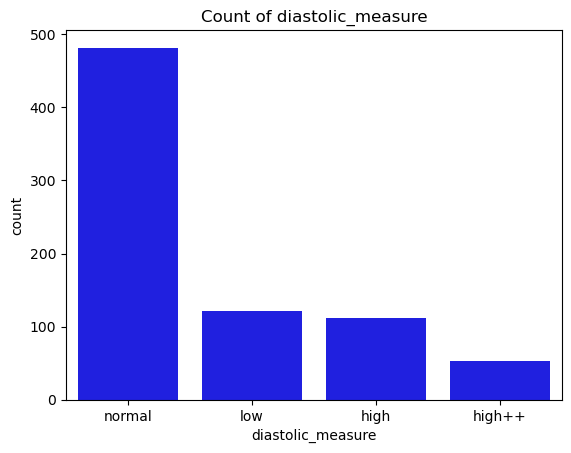

In [23]:
sns.countplot(data = df, x = 'diastolic_measure', color = 'blue');
plt.title('Count of diastolic_measure');

**diastolic measure**

normal-(60-80), low(<59),high(>85),high++(>100)

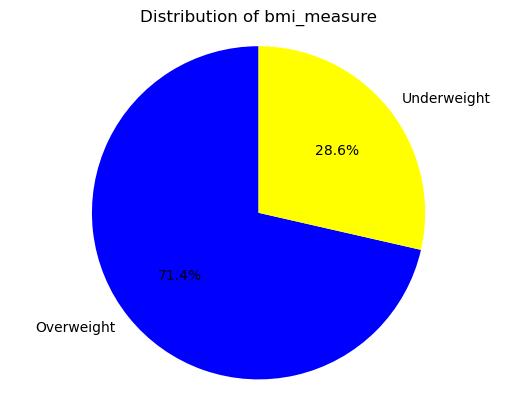

In [24]:
labels=df.bmi_measure.value_counts().index

colors=['blue', 'yellow']
sizes= [1500, 600]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of bmi_measure')
plt.show()

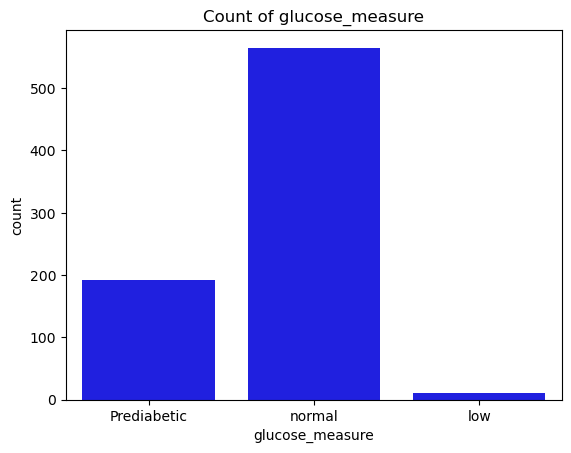

In [25]:
sns.countplot(data = df, x = 'glucose_measure', color = 'blue');
plt.title('Count of glucose_measure');

**glucose measure**
>glucose ingestion after 2hrs

>normal-(<=140mg/dL), Prediabetic-(>140mg/dL ans <=190mg/dL, Diabetic(=>200mg/dL)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

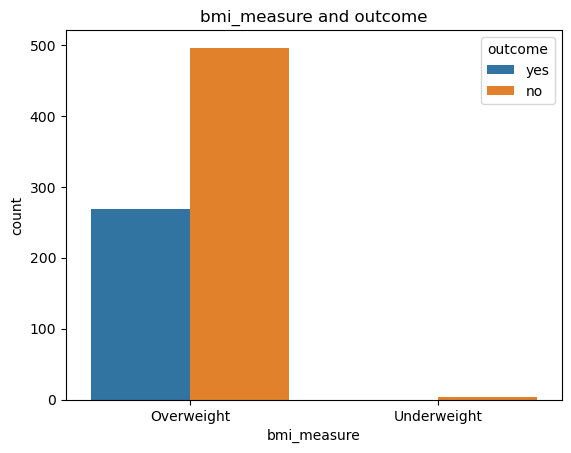

In [37]:
sns.countplot(data =df, x='bmi_measure', hue = 'outcome');
plt.title('bmi_measure and outcome');

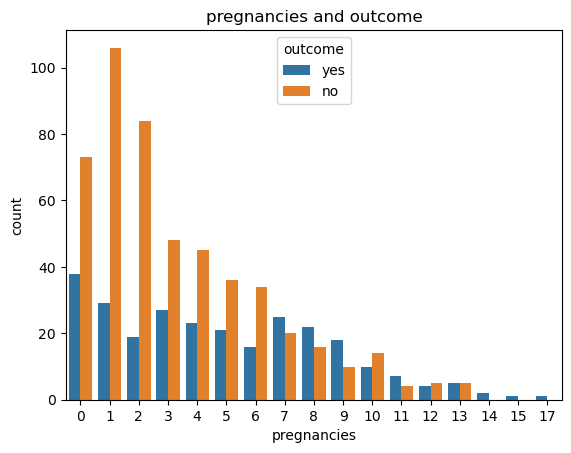

In [28]:
sns.countplot(data =df, x='pregnancies', hue = 'outcome');
plt.title('pregnancies and outcome');

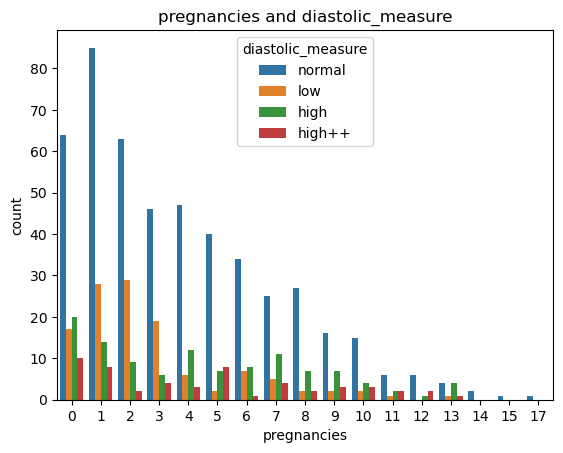

In [29]:
sns.countplot(data =df, x='pregnancies', hue = 'diastolic_measure');
plt.title('pregnancies and diastolic_measure');

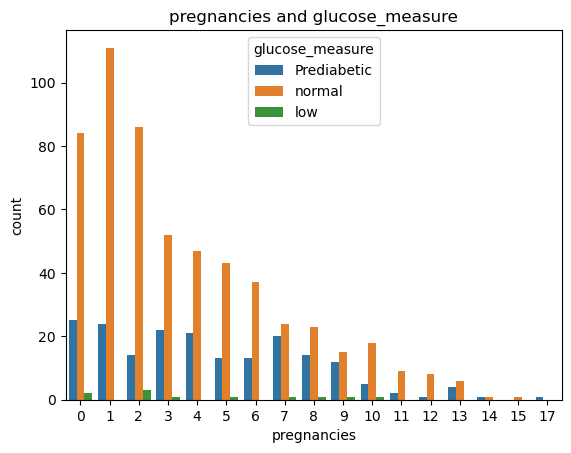

In [30]:
sns.countplot(data =df, x='pregnancies', hue = 'glucose_measure');
plt.title('pregnancies and glucose_measure');

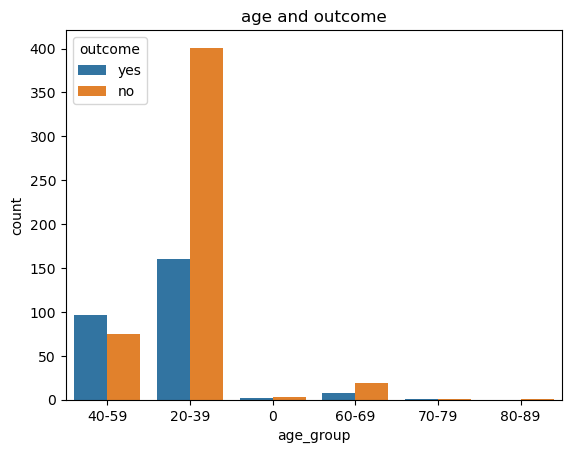

In [31]:
sns.countplot(data =df, x='age_group', hue = 'outcome');
plt.title('age and outcome');

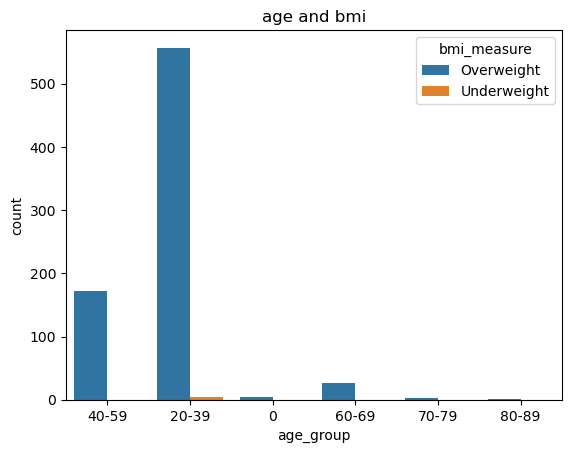

In [32]:
sns.countplot(data =df, x='age_group', hue = 'bmi_measure');
plt.title('age and bmi');

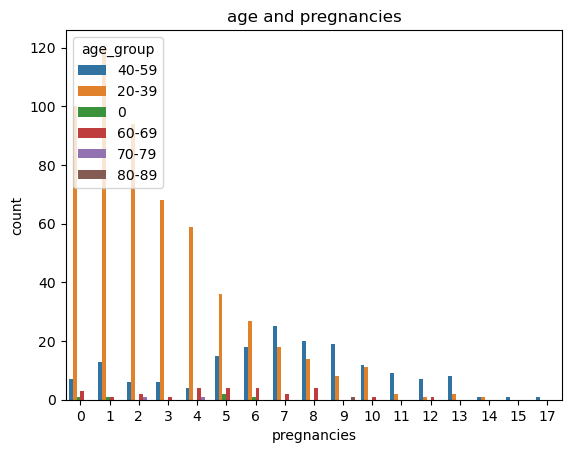

In [27]:
sns.countplot(data =df, x='pregnancies', hue = 'age_group');
plt.title('age and pregnancies');

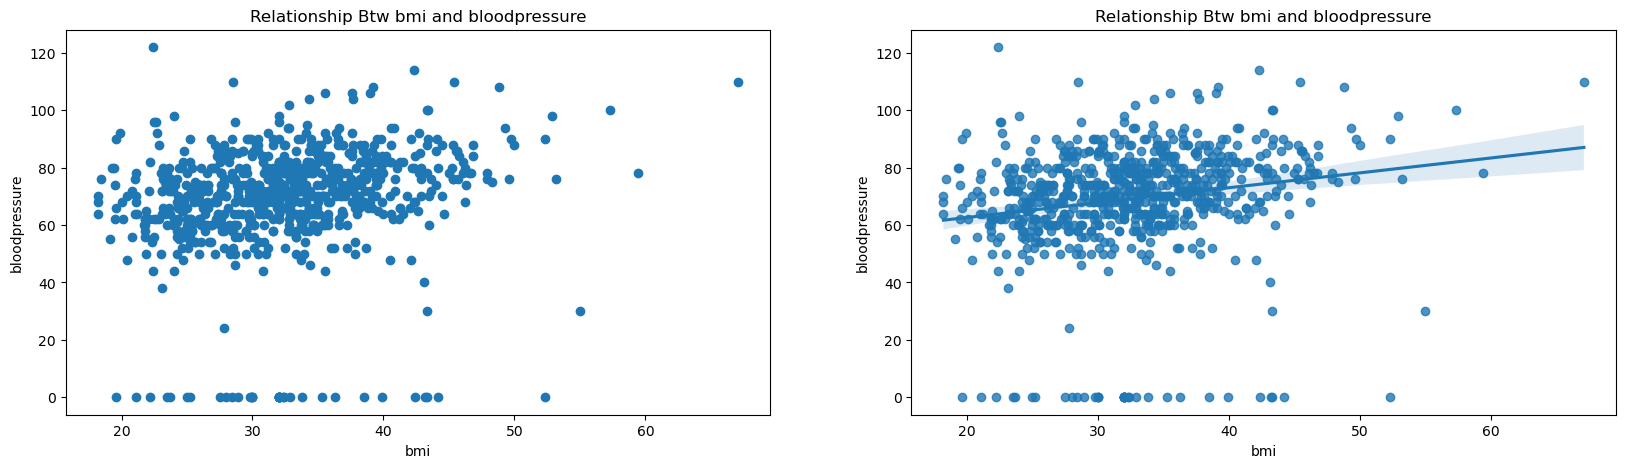

In [34]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.scatter(data = df, x = 'bmi', y = 'bloodpressure');
plt.title('Relationship Btw bmi and bloodpressure');
plt.xlabel('bmi');
plt.ylabel('bloodpressure');

plt.subplot(1,2,2)
sns.regplot(data = df,x = 'bmi', y = 'bloodpressure');
plt.title('Relationship Btw bmi and bloodpressure');
plt.xlabel('bmi');
plt.ylabel('bloodpressure');

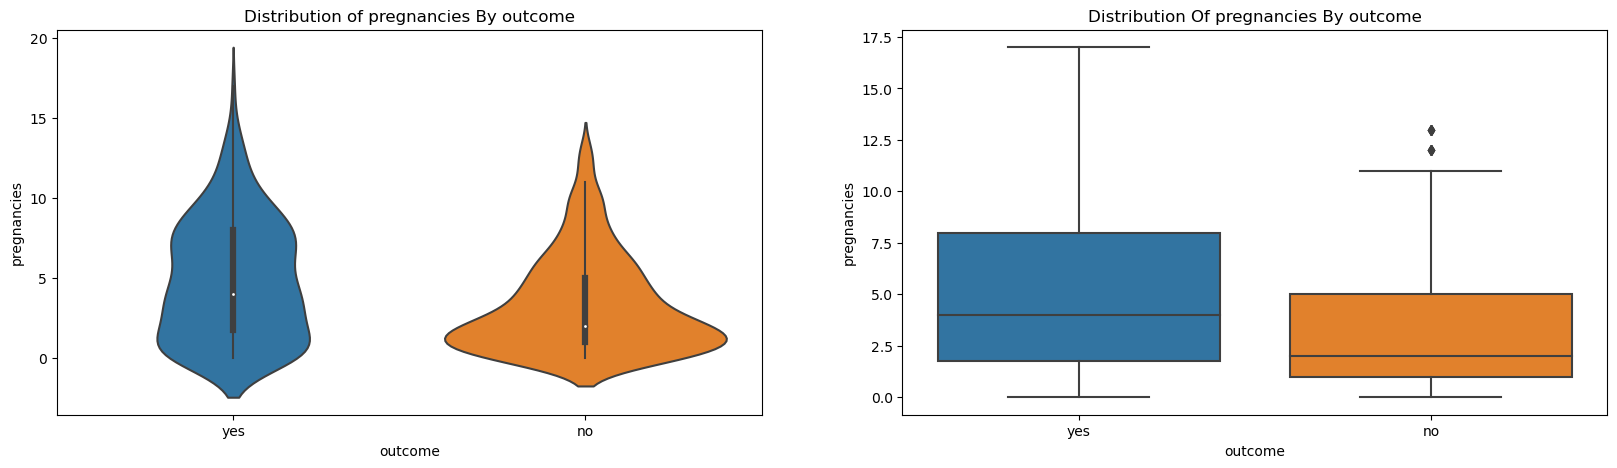

In [35]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.violinplot(data =df, x = 'outcome', y = 'pregnancies');
plt.title('Distribution of pregnancies By outcome');

plt.subplot(1,2,2)
sns.boxplot(data =df, x= 'outcome',y = 'pregnancies');
plt.title('Distribution Of pregnancies By outcome');

### What the data is telling us
>Most of the subjects/volunteers have a normal diastolic blood pressure distribution.

> A higher percentage of the volunteers were overweight, although most have a normal blood plasma glucose level afer 2hrs of glucose ingestion, there was a significant amount of prediabetics.

> There is a high number of overweight volunteers that had an outcome of diabetes, although the relationship is not clearly linear, there is a connection. However there was a much greater number of overweights that did not have an outcome of diabetes.

>The number of pregnancies doesn't have a linear relationship with the outcome of diabetes but there are instances where the onset of diabetes is a result of being pregnant, it was more evident when women had a number of pregnancy greater than seven, seven isn't the lucky number again I guess?

>It was discovered that the outcome of diabetics is not particularly increased as a result of advancement in age as it was found that the age group 20-39 had more diabetic outcome compared to other age groups. Looking further it was found that the age group 20-39 had a high distribution of overweight volunteers, this can as well point to outcome of diabetes  being largely dependent on the a higher BMI index irrespective of age.


## Conclusion
> The different factors and predictive measures for a diabetic outcome isn't as reliable as suggested by the analysis of the dataset, however one can not deny the trend and possible link between being overweight and having a possible diabetic outcome. I would say this subjections isn't cast on stone, there is a need to continuing probing data for more definite insights.  